In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("spotify.csv")
df.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [6]:
features = ['danceability', 'energy', 'valence', 'tempo',
            'acousticness', 'instrumentalness', 'liveness', 'speechiness']

X = df[features].values

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


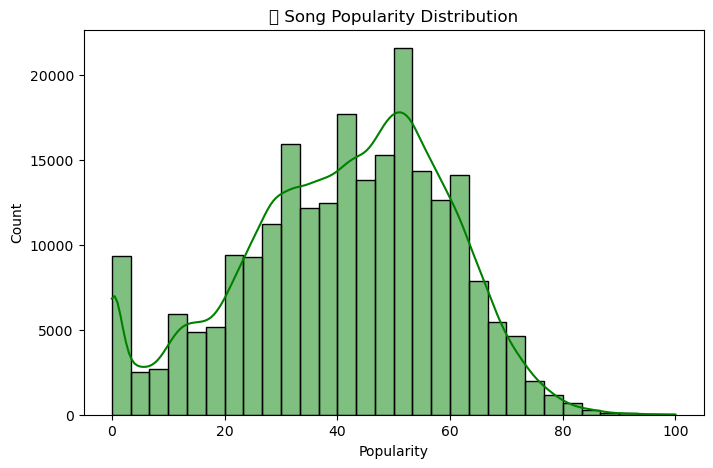

In [8]:
# Distribution of Popularity
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color="green")
plt.title("🎵 Song Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

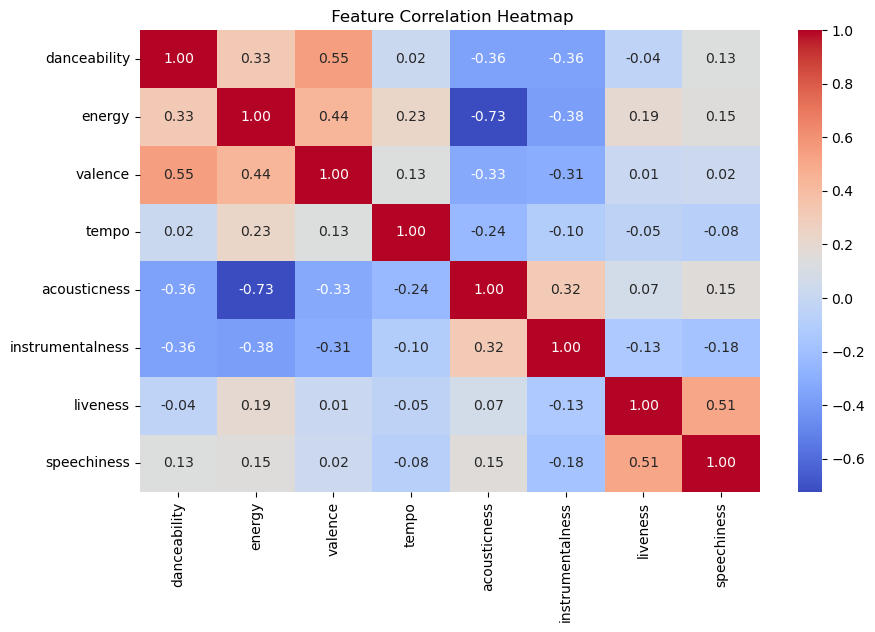

In [10]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Feature Correlation Heatmap")
plt.show()

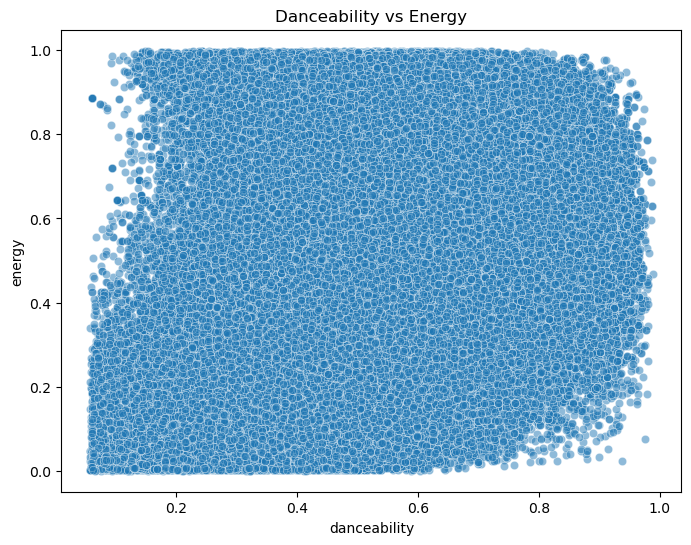

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="danceability", y="energy", data=df, alpha=0.5)
plt.title("Danceability vs Energy")
plt.show()

In [14]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [16]:
model = NearestNeighbors(n_neighbors=6, metric="euclidean")
model.fit(X_train)

NearestNeighbors(metric='euclidean', n_neighbors=6)

In [18]:
distances, indices = model.kneighbors([X_test[0]])
print("Test Song Recommendations:")
for i in indices[0]:
    print(df.iloc[i]['track_name'], "—", df.iloc[i]['artist_name'])

Test Song Recommendations:
Excuse Me — Nothing But Thieves
Win — Tee Grizzley
Beep! Beep! - Remastered — Louis Prima
Three Blind Mice — Big Youth
Kuroi Tsuki No Joou No Theme — TeddyLoid
Equinoxe, Pt. 5 — Jean-Michel Jarre


In [24]:
df.to_csv("/Users/rnegilxm162004/Documents/pythonProject2/spotify-project/spotify_clean.csv", index=False)

In [28]:
with open("/Users/rnegilxm162004/Documents/pythonProject2/spotify-project/spotify_model.pkl", "wb") as f:
    pickle.dump(model, f)